In [1]:
from carbon import CarbonSimulatorUI, CarbonOrderUI, P, __version__, __date__
from carbon.helpers import print_version, PathInterpolation as PI, interpolate, plt_style
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12,6]
plt_style('seaborn-v0_8-dark', 'seaborn-dark')
print_version(require="2.2.6")

Carbon v2.2.6-BETA0 (28/Jan/2022)
CarbonSimulatorUI v2.5 (25/Jan/2023)
CarbonOrderUI v1.6.2 (27/Jan/2023)


# Path Interpolation in helpers (NBTest 55)

## Path Interpolation [NOTEST]

### Gaussian bridge

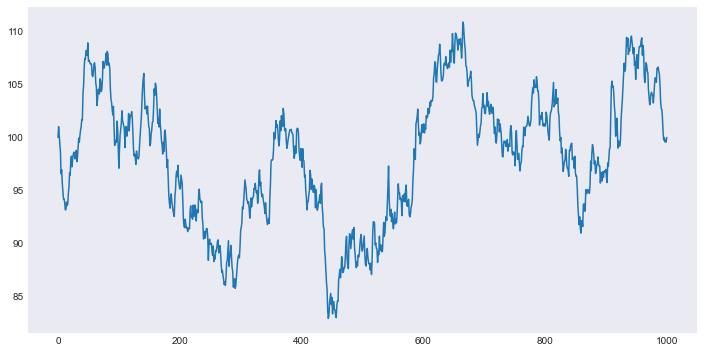

In [2]:
y = PI.gaussian_bridge(100, 100, 0.3, 1000)
plt.plot(y)

In [3]:
PI.estimate_vol_np(y)

(29.2187332330753, 0.29925876320703043)

### Path segment

estimated vol: (55.21011580433988, 0.6989276655115595)


2020-01-01    100
2020-07-01    120
dtype: int64

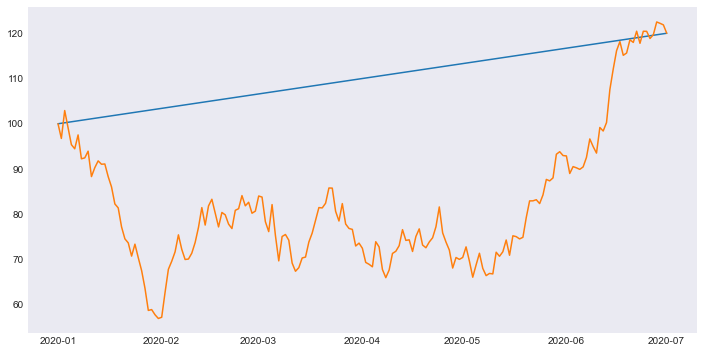

In [4]:
path_segment = pd.Series([100,120], index=[pd.Timestamp("2020-01-01"), pd.Timestamp("2020-07-01")])
path_segmenti = PI.interpolate_segment(path_segment, sig=0.5, period=PI.days(1))
plt.plot(path_segment)
plt.plot(path_segmenti)
print("estimated vol:", PI.estimate_vol(path_segmenti))
path_segment

### Path

estimated vol: (60.083000566452874, 0.5059097725108819)


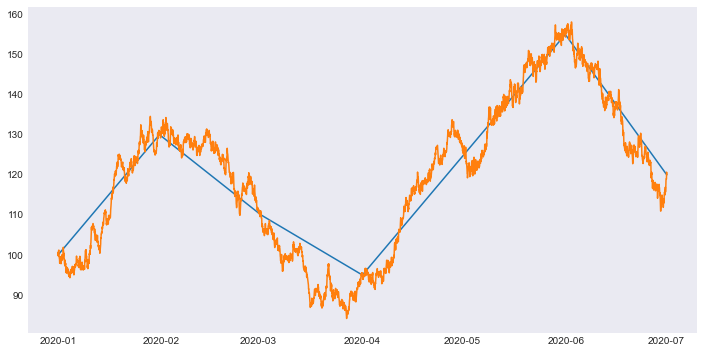

In [5]:
path_data = [100,130,110,95,125,155,120]
numseg = len(path_data)-1
start_dt = pd.Timestamp("2020-01-01")
end_dt = pd.Timestamp("2020-07-01")
delt = (end_dt-start_dt)/numseg
path_ix = [start_dt+i*delt for i in range(numseg+1)]
path = pd.Series(path_data, index=path_ix)
pathi = PI.interpolate(path, sig=0.5, period=PI.hours(1))
plt.plot(path)
plt.plot(pathi)
print("estimated vol:", PI.estimate_vol(pathi))

## Path Interpolation

In [6]:
assert PI.minutes(60) == PI.hours(1)
assert PI.days(1) == PI.hours(24)

In [7]:
path_segment = pd.Series([100,120], index=[pd.Timestamp("2020-01-01"), pd.Timestamp("2020-07-01")])
path_segmenti = PI.interpolate_segment(path_segment, sig=0.5, period=PI.days(1))
assert len(path_segmenti) == 183
assert path_segmenti[0] == 100
assert path_segmenti[-1] == 120
assert path_segmenti.index[1]-path_segmenti.index[0] == PI.days(1)
assert PI.estimate_vol(path_segmenti)

In [8]:
path_data = [100,130,110,95,125,155,120]
numseg = len(path_data)-1
start_dt = pd.Timestamp("2020-01-01")
end_dt = pd.Timestamp("2020-02-01")
delt = (end_dt-start_dt)/numseg
path_ix = [start_dt+i*delt for i in range(numseg+1)]
path = pd.Series(path_data, index=path_ix)
pathi = PI.interpolate(path, sig=0.5, period=PI.hours(1))

In [9]:
assert len(pathi)==745
assert pathi.index[1]-pathi.index[0] == PI.hours(1)
assert pathi[0] == 100
assert pathi[-1] == 120